In [14]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

%matplotlib inline

D:\myd\ac\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
Farm_Sizes=[1,1,2,2,2.3,3,3,3.5,4,4.3]
Crop_Yield=[6.9,6.7,13.8,14.7,16.5,18.7,17.4,22,29.4,34.5]
farm_crop=pd.DataFrame({'Farm_Sizes':Farm_Sizes,'Crop_Yield':Crop_Yield})
farm_crop

,Crop_Yield,Farm_Sizes
0,6.9,1.0
1,6.7,1.0
2,13.8,2.0
3,14.7,2.0
4,16.5,2.3
5,18.7,3.0
6,17.4,3.0
7,22.0,3.5
8,29.4,4.0
9,34.5,4.3


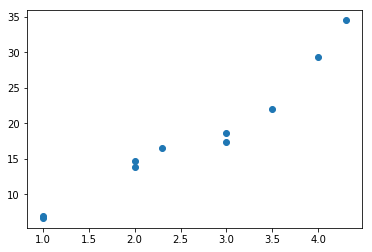

In [19]:
plt.scatter(farm_crop['Farm_Sizes'],farm_crop['Crop_Yield'])
plt.show()

In [21]:
Farm_Sizes_1=sm.add_constant(Farm_Sizes)
Farm_Sizes_1

array([[ 1. ,  1. ],
       [ 1. ,  1. ],
       [ 1. ,  2. ],
       [ 1. ,  2. ],
       [ 1. ,  2.3],
       [ 1. ,  3. ],
       [ 1. ,  3. ],
       [ 1. ,  3.5],
       [ 1. ,  4. ],
       [ 1. ,  4.3]])

In [22]:
model=sm.OLS(Crop_Yield,Farm_Sizes_1)
results= model.fit()
print results.params

[-1.32137039  7.42581241]


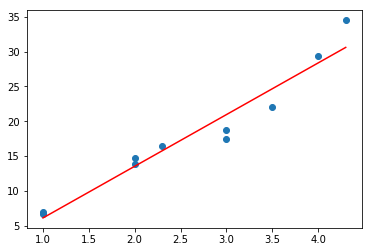

In [24]:
Crop_Yield_predicted=results.predict(Farm_Sizes_1)
plt.scatter(farm_crop['Farm_Sizes'],farm_crop['Crop_Yield'])
plt.plot(Farm_Sizes,Crop_Yield_predicted,'r')
plt.show()

In [27]:
results_formula=sm.formula.ols(formula='Crop_Yield~Farm_Sizes',data=farm_crop).fit()
print results_formula.params

Intercept    -1.321370
Farm_Sizes    7.425812
dtype: float64


Farm_Sizes    6.994877
dtype: float64


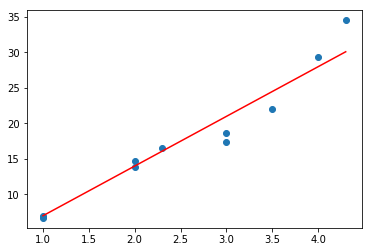

In [29]:
results_without_intercept=sm.formula.ols(formula='Crop_Yield~Farm_Sizes-1',data=farm_crop).fit()
print results_without_intercept.params
Crop_Yield_predicted=results_without_intercept.predict(Farm_Sizes)
plt.scatter(farm_crop['Farm_Sizes'],farm_crop['Crop_Yield'])
plt.plot(Farm_Sizes,Crop_Yield_predicted,'r')
plt.show()

In [34]:
#implementation of the OLS
X=[1,1,2,2,2.3,3,3,3.5,4,4.3]
Y=[6.9,6.7,13.8,14.7,16.5,18.7,17.4,22,29.4,34.5]
var=np.var(X,ddof=1)
print var

cov=np.cov(X,Y)
print cov

b=cov[0][1]/var
a=np.mean(Y)-b*np.mean(X)
print a,b

1.32322222222
[[  1.32322222   9.826     ]
 [  9.826       77.856     ]]
-1.32137039214 7.42581241078


In [37]:
X= [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]

df2=pd.DataFrame(X,columns=['Price','AdSpends'])
df2['sales']=pd.Series(Y)
model=sm.formula.ols(formula='sales~Price+AdSpends',data=df2)
result=model.fit()
print result.params

Intercept    1.633842
Price       -0.006379
AdSpends     0.003161
dtype: float64
